In [1]:
import whitebox
import os
import matplotlib.pyplot as plt
import imageio
import geopandas as gp
from scipy import misc 
import glob as glob
import numpy as np
import shutil
%matplotlib inline

parent = os.path.dirname(os.path.abspath(os.getcwd()))
wd = parent + '/datasets/stamp_data'

from WBT.whitebox_tools import WhiteboxTools
wbt = WhiteboxTools()
wbt.set_verbose_mode(False)

# tile the las file

In [2]:
wbt.set_working_dir(wd)

if os.path.isdir(wd + '/stamp/'):
    shutil.rmtree(wd + '/stamp/') 

width = 100
height = 100
pts = 'stamp.las'
# breaks lidar into tiles; all tiles stored in folder with name of original las file
wbt.lidar_tile(
    i=pts, 
    width=width, 
    height=height, 
    origin_x=0.0, 
    origin_y=0.0, 
    min_points=2)

0

In [3]:
# get tile files list, create folders for point densities (total and ground)
fs = glob.glob(wd + '/stamp/*.las')

# resolution of lpi raster, and radius over which points are counted
res = 2.0
radius_of_effect = 2.0

# easily parallelized, for loop for now
for f in fs:
    # navigate into tiles folder and calculate densities for current tile
    wbt.set_working_dir(wd + '/stamp')
    wbt.lidar_point_density(
            i=f, 
            output='density.tif',resolution=res,radius=radius_of_effect
        )
    wbt.lidar_point_density(
            i=f, 
            output='gd_density.tif', exclude_cls='1',resolution=res,radius=radius_of_effect
        )
    
    if f==fs[0]:
        wbt.divide(
            'gd_density.tif', 
            'density.tif', 
            'lpi.tif'
        )
    else: 
        wbt.divide(
            'gd_density.tif', 
            'density.tif', 
            'lpi_current.tif'
        )
        wbt.mosaic(
            output='lpi.tif', 
            inputs='lpi.tif,lpi_current.tif', 
            method="nn")

source = wd + '/stamp/lpi.tif'
target = wd + '/lpi.tif'
cmd = 'gdalwarp -s_srs EPSG:26910 -t_srs EPSG:26910 ' + source + ' ' + target
os.system(cmd)

0

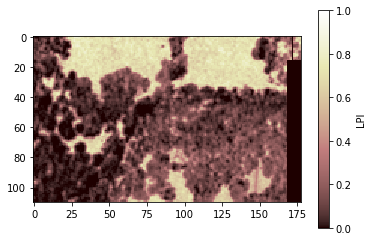

In [17]:
import rasterio
from matplotlib import pyplot
src = rasterio.open(wd + '/lpi.tif')
f,ax = plt.subplots(1)
mappable = ax.imshow(src.read(1), cmap='pink', vmin=0, vmax=1)
cb = f.colorbar(mappable)
cb.set_label('LPI')

In [ ]:
# # get tile files list, create folders for point densities (total and ground)
# fs = glob.glob(wd + '/stamp/*.las')
# os.system('mkdir ' + wd + '/stamp/densities')
# os.system('mkdir ' + wd + '/stamp/gd_densities')

# # resolution of lpi raster, and radius over which points are counted
# res = 2.0
# radius_of_effect = 2.0

# # easily parallelized, for loop for now
# for f in fs:
#     # navigate into tiles folder and calculate densities for current tile
#     wbt.set_working_dir(wd + '/stamp')
#     wbt.lidar_point_density(
#             i=f, 
#             output='density.tif',resolution=res,radius=radius_of_effect
#         )
#     wbt.lidar_point_density(
#             i=f, 
#             output='gd_density.tif', exclude_cls='1',resolution=res,radius=radius_of_effect
#         )
#     wbt.set_working_dir(wd)
    
#     # create raster density for all points, project it using gdal
#     tosave = f.split('/')[-1].split('.')[0] + '_density.tif'
#     source = wd + '/stamp/density.tif'
#     target = wd + '/stamp/densities/' + tosave
#     cmd = 'gdalwarp -s_srs EPSG:26910 -t_srs EPSG:26910 ' + source + ' ' + target
#     os.system(cmd)
#     # load density as georasters
#     rtotal = gr.from_file(target)
    
#     # create raster density for ground
#     tosave = f.split('/')[-1].split('.')[0] + '_gd_density.tif'
#     source = wd + '/stamp/gd_density.tif'
#     target = wd + '/stamp/gd_densities/' + tosave
#     cmd = 'gdalwarp -s_srs EPSG:26910 -t_srs EPSG:26910 ' + source + ' ' + target
#     os.system(cmd)
#     # load ground point density
#     rground = gr.from_file(target)
    
    
#     # lpi is just ratio of ground to total
#     lpi_current = rtotal**(-1)*rground
    
#     # merge current lpi tile with total raster
#     # if first tile, create the lpi raster
#     if f==fs[0]:
#         lpi = lpi_current.copy()
#     lpi = lpi.union(lpi_current)

In [ ]:

# dem = os.path.join(wd,'stamp_dem.tif')
# breached = os.path.join(wd, 'stamp_dem_breached.tif')
# d8 = os.path.join(wd, 'stamp_dem_d8.tif')
# dinf = os.path.join(wd, 'stamp_dem_dinf.tif')
# accum = os.path.join(wd, 'stamp_dem_accum.tif')
# basins = os.path.join(wd, 'stamp_dem_basins.tif')
# basins_poly = os.path.join(wd, 'stamp_dem_basins.shp')

# wbt.flow_accumulation_full_workflow(
#     dem, 
#     out_dem=breached, 
#     out_pntr=d8, 
#     out_accum=accum, 
#     out_type="catchment area", 
#     log=False, 
#     clip=False, 
#     esri_pntr=False
# )


# streams200 =  os.path.join(wd, 'stamp_dem_streams200.tif')

# wbt.extract_streams(
#     accum, 
#     output=streams200, 
#     threshold=200, 
#     zero_background=True)
